In [62]:
%matplotlib widget
import cvxpy as cp
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("bmh")

In [49]:
T = 200
N = 200

t = np.linspace(0, T, N+1)

h = lambda t : 1/9 * (0.9)**t * (1 - 0.4*np.cos(2*t))

y_des = np.zeros_like(t)
y_des[t>50] = y_des[t>50] + 1
y_des[t>100] = y_des[t>100] - 2 
y_des[t>150] = y_des[t>150] + 1 

u = cp.Variable(N+1)
impulse = cp.Constant(h(t))
y = cp.convolve(impulse, u)

J_track = 0
J_mag = 0
J_der = 0
for i in range(N+1):
    J_track = J_track + cp.sum_squares(y[i] - y_des[i])
    J_mag = J_mag + cp.sum_squares(u[i])
    if i < N:
        J_der = J_der + cp.sum_squares(u[i+1] - u[i], )
J_track = J_track / (N+1)
J_mag = J_mag / (N+1)
J_der = J_der / (N)

param_combos = [
    (0, 0.005),
    (0, 0.05),
    (0.3, 0.05)
]

inputs = np.empty((len(param_combos), N+1))
outputs = np.empty((len(param_combos), N+1))
for idx, params in enumerate(param_combos):
    cost = J_track + params[0]*J_der + params[1]*J_mag
    prob = cp.Problem(cp.Minimize(cost))
    prob.solve()
    inputs[idx] = u.value
    outputs[idx] = y.value[:N+1]


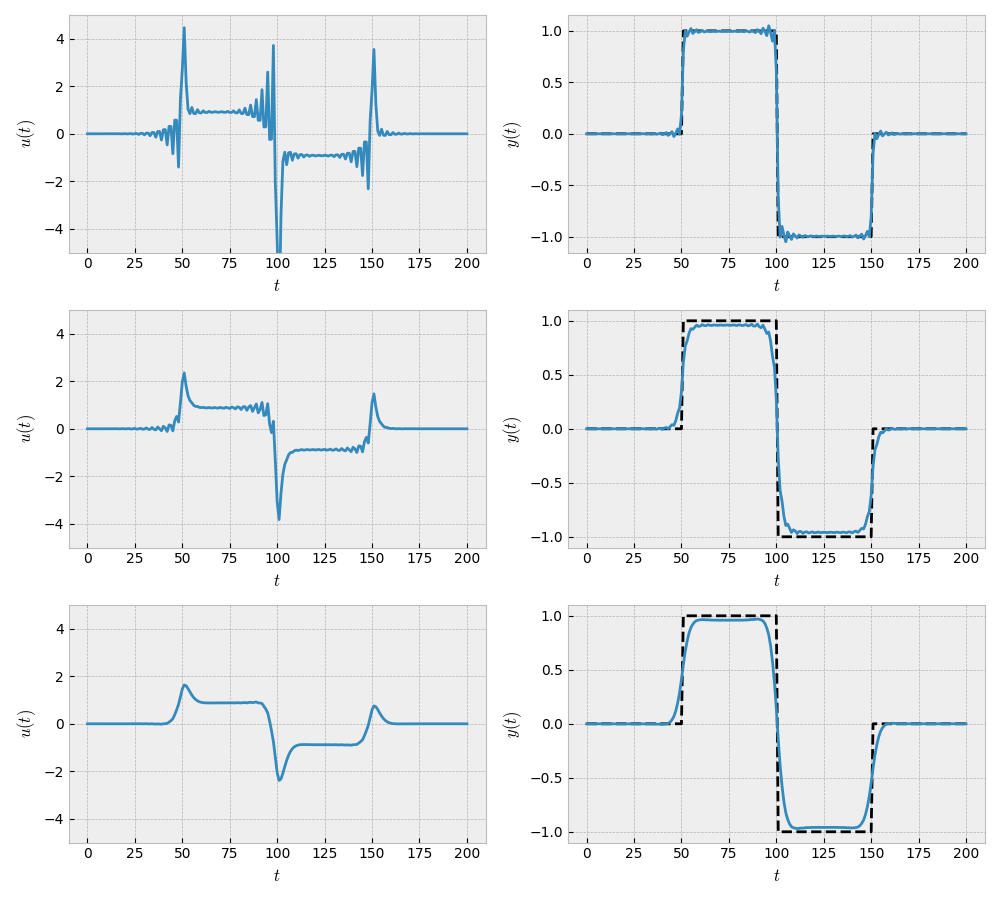

In [63]:
fig, axs = plt.subplots(len(param_combos),2)
fig.set_size_inches(10,3*len(param_combos))

for ax, input, output in zip(axs, inputs, outputs):
    ax[0].plot(t, input)
    ax[1].plot(t, y_des, "--k")
    ax[1].plot(t, output)

    ax[0].set_ylim(-5, 5)
    ax[0].set_ylabel("$u(t)$")
    ax[0].set_xlabel("$t$")
    ax[1].set_ylabel("$y(t)$")
    ax[1].set_xlabel("$t$")


plt.tight_layout()